Sumber data : https://www.kaggle.com/datasets/wageraldine/data-harga-rumah-jakarta-selatan-csv?resource=download

# **Import Data**

In [45]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Iqbalpr/EDA/main/HARGA%20RUMAH%20JAKSEL.csv'
Data = pd.read_csv(url)
Data.index = Data.index + 1 # Memulai index dari angka 1
Data

,HARGA,LT,LB,JKT,JKM,GRS
1,28.000.000.000,1100,700,5,6,ADA
2,19.000.000.000,824,800,4,4,ADA
3,4.700.000.000,500,400,4,3,ADA
4,4.900.000.000,251,300,5,4,ADA
5,28.000.000.000,1340,575,4,5,ADA
...,...,...,...,...,...,...
997,16.000.000.000,488,550,6,5,ADA
998,4.500.000.000,209,270,4,4,ADA
999,29.000.000.000,692,400,4,3,TIDAK ADA
1000,1.700.000.000,102,140,4,3,TIDAK ADA


In [ ]:
# Selanjutnya periksa jumlah kolom dan baris
Data.shape

(1001, 6)

Dapat dilihat bahwa data memiliki 1001 baris dan 6 kolom.

# **Merapihkan Data**

Langkah selanjutnya menghapus kolom yang tidak diperlukan. Karena pada data ini semua kolom diperlukan, maka tidak ada proses penghapusan kolom

Selanjutnya kita mengoreksi tipe variabel

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 1 to 1001
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   object
 1   LT      1001 non-null   int64 
 2   LB      1001 non-null   int64 
 3   JKT     1001 non-null   int64 
 4   JKM     1001 non-null   int64 
 5   GRS     1001 non-null   object
dtypes: int64(4), object(2)
memory usage: 47.1+ KB


Dapat dilihat bahwa kolom "HARGA" seharusnya bertipe int/float dan kolom "GRS" seharusnya bertipe kategori

In [ ]:
Data['HARGA'] = Data['HARGA'].str.replace('.','').astype(int)
Data['GRS'] = Data['GRS'].astype('category')
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 1 to 1001
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   HARGA   1001 non-null   int64   
 1   LT      1001 non-null   int64   
 2   LB      1001 non-null   int64   
 3   JKT     1001 non-null   int64   
 4   JKM     1001 non-null   int64   
 5   GRS     1001 non-null   category
dtypes: category(1), int64(5)
memory usage: 40.3 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


Dapat dilihat bahwa tipe data telah sesuai, selanjutnya kita lakukan tahap pre-processing

# **Pre-processing dan Model Prediksi**

Selanjutnya kita cek apakah terdapat Missing Values

In [ ]:
Data.isnull().sum()

HARGA    0
LT       0
LB       0
JKT      0
JKM      0
GRS      0
dtype: int64

Dapat dilihat bahwa data tidak missing values, selanjutnya mari kita periksa apakah data memiliki duplikat

In [ ]:
Data.duplicated().sum()

70

In [ ]:
Data.shape

(931, 6)

Ternyata data memiliki duplikat, maka harus kita hapus

In [ ]:
Data.drop_duplicates(inplace=True)
Data.duplicated().sum()

0

Sekarang data yang berduplikat telah terhapus, selanjutnya kita lakukan proses penghapusan outlier

HARGA


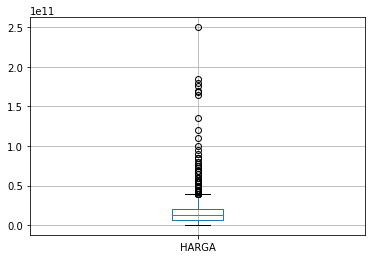

In [ ]:
import matplotlib.pyplot as plt

# Pengecekan outlier terhadap semua kolom numeric
def plot_boxplot(df, ft):
  df.boxplot(column=[ft])
  plt.grid(True)
  plt.show()

plot_boxplot(Data, input())
# Text input dapat copy paste dari nama kolom (bertipe int/float) yang terdapat dalam Data.info()

In [ ]:
Col = ['HARGA', 'LT', 'LB', 'JKT', 'JKM']

Q1 = Data[Col].quantile(0.25)
Q3 = Data[Col].quantile(0.75)
IQR = Q3 - Q1

Data2 = Data[~((Data[Col] < (Q1 - 1.5 * IQR)) |(Data[Col] > (Q3 + 1.5 * IQR))).any(axis=1)]
Data2.reset_index(drop=True)

,HARGA,LT,LB,JKT,JKM,GRS
0,19000000000,824,800,4,4,ADA
1,4700000000,500,400,4,3,ADA
2,4900000000,251,300,5,4,ADA
3,28000000000,1340,575,4,5,ADA
4,10000000000,460,300,4,4,ADA
...,...,...,...,...,...,...
743,16000000000,488,550,6,5,ADA
744,4500000000,209,270,4,4,ADA
745,29000000000,692,400,4,3,TIDAK ADA
746,1700000000,102,140,4,3,TIDAK ADA


In [ ]:
Data2.shape

(748, 6)

Dapat dilihat bahwa outlier dalam data sudah terhapus, selanjutnya kita buat model

In [ ]:
from statsmodels.formula.api import ols
Reg1 = ols('HARGA ~ LT + LB + JKT + JKM + C(GRS)', data=Data2).fit() 
print(Reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                  HARGA   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     264.7
Date:                Sat, 30 Apr 2022   Prob (F-statistic):          3.11e-162
Time:                        14:54:09   Log-Likelihood:                -17726.
No. Observations:                 748   AIC:                         3.546e+04
Df Residuals:                     742   BIC:                         3.549e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5.189e+08   9

Interpretasi
*   **Y = 518900000 + 13800000(LT) + 15910000(LB) - 534700000(JKT) + 558900000(JKM) - 436900000(GRS)**

*   **Nilai *R-squared* atau koefisien determinasi adalah 64%**






**Note** : untuk mendapatkan angka dari bentuk "5.189e+08", dapat menggunakan website ini https://calculator.name/scientific-notation-to-decimal/4.369e+08

Melihat tabel korelasi

In [ ]:
Data2.corr().style.background_gradient('YlGnBu').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


,HARGA,LT,LB,JKT,JKM
HARGA,1.00,0.74,0.71,0.35,0.36
LT,0.74,1.00,0.66,0.41,0.30
LB,0.71,0.66,1.00,0.43,0.48
JKT,0.35,0.41,0.43,1.00,0.54
JKM,0.36,0.30,0.48,0.54,1.00


Dapat dilihat bahwa variabel yang paling mempengaruhi Harga adalah LT dan LB dibandingkan dengan variabel JKT dan JKM

In [47]:
# Kita coba model yang telah kita dapat
# Iqbal ingin membeli rumah dengan luas tanah sebesar 900, luas bangunan 300 jumlah kamar tidur 5, kamar mandi 4 dan ada garasi (1 = ada, 0 = tidak ada)
# Prediksi harga rumah idaman iqbal
LT = int(input())
LB = int(input())
JKT = int(input())
JKM = int(input())
GRS = int(input())

Y = 518900000 + 13800000*(LT) + 15910000*(LB) - 534700000*(JKT) + 558900000*(JKM) - 436900000*(GRS)
print('-----------------')
print("Harga rumah idaman iqbal adalah sebesar Rp", Y)

900
300
5
4
1
-----------------
Harga rumah idaman iqbal adalah sebesar Rp 16837100000


# **Visualisasi Data**

In [70]:
import seaborn as sns
import numpy as np
from collections import Counter

In [88]:
# Kita input code untuk melihat values dari plot plot yang nanti digunakan
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

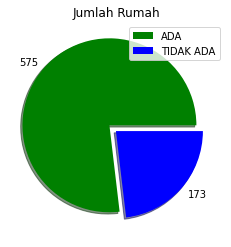

In [80]:
# 1.
# Apakah terdapat perbedaan jumlah rumah yang dijual terhadap ada atau tidaknya garasi?
data = Data2['GRS']

proporsion = Counter(data)
values = [int(v) for v in proporsion.values()]
colors = ['g', 'b']
labels = proporsion.keys()
explode = (0.1, 0,)
plt.pie(values, colors=colors, labels= values, explode=explode, shadow=True)
plt.title('Jumlah Rumah')
plt.legend(labels,loc='best')
plt.show()

Dapat dilihat bahwa didaerah jakarta selatan, lebih banyak rumah yang dijual dengan memiliki garasi

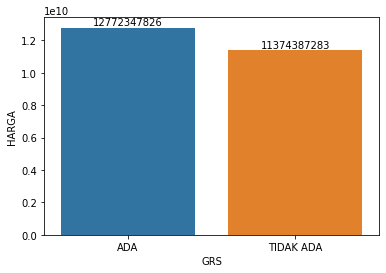

In [67]:
# 2.
# Apakah garasi mempengaruhi harga rumah yang dijual?
ax = sns.barplot(x="GRS", y="HARGA", ci=None, data=Data2)
show_values(ax)

Dapat dilihat bahwa harga rumah yang memiliki garasi akan lebih mahal dibandingkan rumah yang tidak memiliki garasi

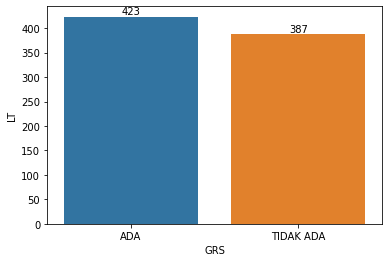

In [68]:
# 3.
# Apakah garasi mempengaruhi harga rumah yang dijual?
ax = sns.barplot(x="GRS", y="LT", ci=None, data=Data2)
show_values(ax)

Dapat dilihat bahwa rumah yang memiliki garasi akan lebih luas dibandingkan rumah yang tidak memiliki garasi, dan ini berkorelasi dengan plot #2 yang mengakibatkan harga rumah yang terdapat garasi lebih mahal

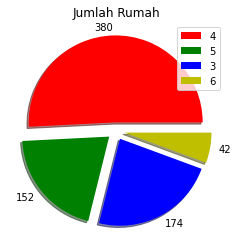

In [83]:
# 4.
# Apakah terdapat perbedaan jumlah rumah yang dijual terhadap ajumlah kamar tidur?
data = Data2['JKT']

proporsion = Counter(data)
values = [int(v) for v in proporsion.values()]
colors = ['r', 'g', 'b', 'y']
labels = proporsion.keys()
explode = (0.1, 0.1, 0.1, 0.1)
plt.pie(values, colors=colors, labels= values, explode=explode, shadow=True)
plt.title('Jumlah Rumah')
plt.legend(labels,loc='best')
plt.show()

Dapat dilihat bahwa didaerah jakarta selatan, lebih banyak rumah yang dijual dengan memiliki 4 kamar tidur

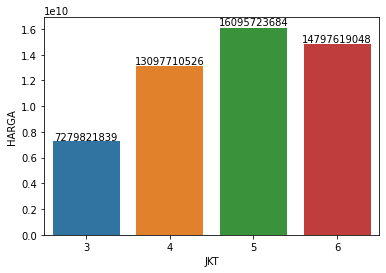

In [66]:
# 5.
# Apakah jumlah kamar tidur mempengaruhi harga rumah yang dijual?
ax = sns.barplot(x="JKT", y="HARGA", ci=None, data=Data2)
show_values(ax)

Dapat dilihat bahwa harga rumah dengan jumlah kamar tidur 5, memiliki harga yang lebih mahal dibandingkan dengan rumah yang memiliki kamar tidur 6 dan 4 